In [1]:
import os
os.chdir('/engram/nklab/hossein/recurrent_models/BLT_models')
!pwd

%matplotlib inline 
import matplotlib.pyplot as plt

import datasets
import pandas as pd
import numpy as np
import csv
import torch
from matplotlib.patches import Rectangle
import torchvision
from PIL import Image
from models.cornet import get_cornet_model
import torch.nn as nn
from collections import OrderedDict
import rsatoolbox
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from analyze_representations import sample_vggface2, calc_rdms, plot_maps, compare_rdms,\
  plot_recurrent_rdms, reduce_dim, plot_dim_reduction_one, sample_FEI_dataset, \
  plot_rdm_mds, load_model_path, load_pretrained_models, extract_features, kasper_dataset

/engram/nklab/hossein/recurrent_models/BLT_models


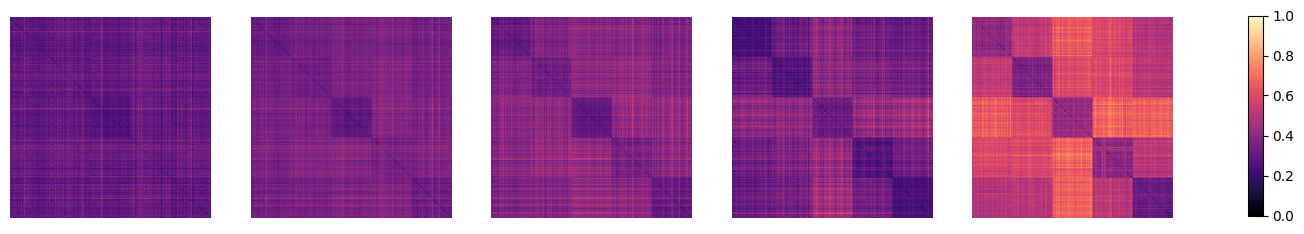

In [2]:
#
model, gap = load_model_path('./results/classification/vggface2/blt_bl/run_1/')
imgs, labels = sample_vggface2(num_cats=5, per_cat=150)
layers = ['IT' ] #, 'V4', 'V2', 'V1']
save = 'rt8_vggface2'
plot_rdm_mds(model, imgs, labels, layers, plot='rdm', save=None)

rdms_m
executed save
rdms_i
executed save


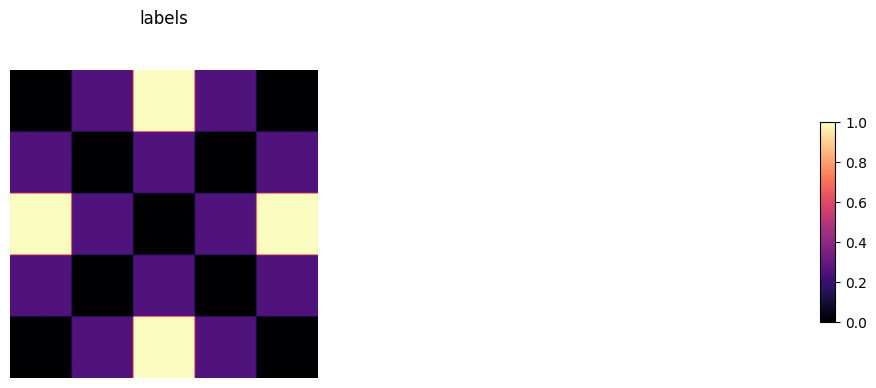

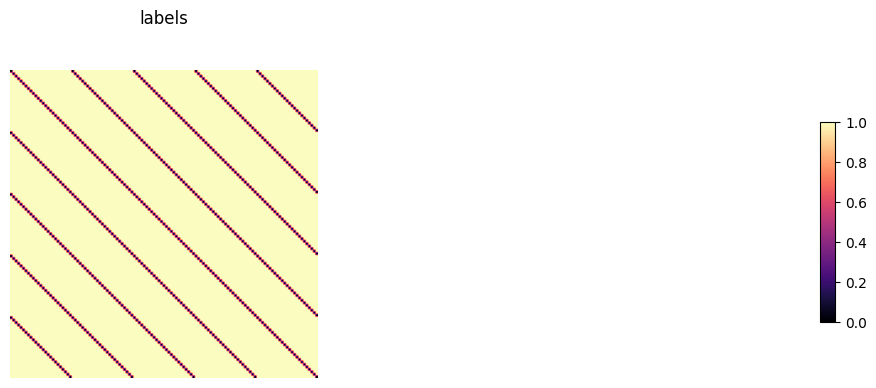

In [12]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=25)

labels_o = labels_o.unsqueeze(1)
labels_m = labels_m.unsqueeze(1)
labels = F.one_hot(labels_i)

rdms, rdms_dict = calc_rdms({'labels' : labels_m.float().numpy()}, method='euclidean')
_ = plot_maps(rdms_dict, save='./results/rdms_m')

rdms, rdms_dict = calc_rdms({'labels' : labels.float().numpy()}, method='euclidean')
_ = plot_maps(rdms_dict, save='./results/rdms_i')

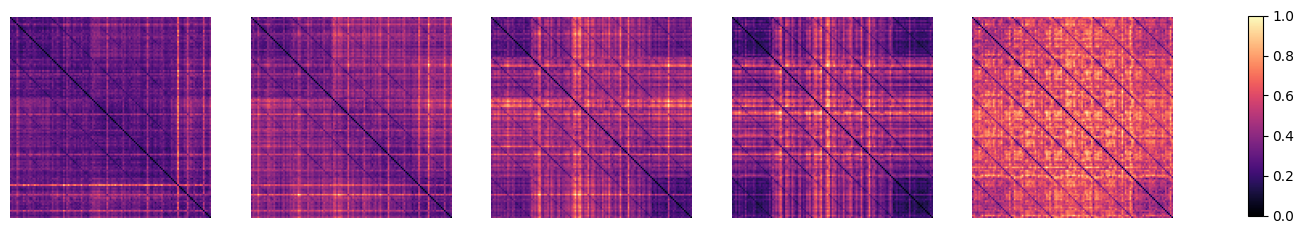

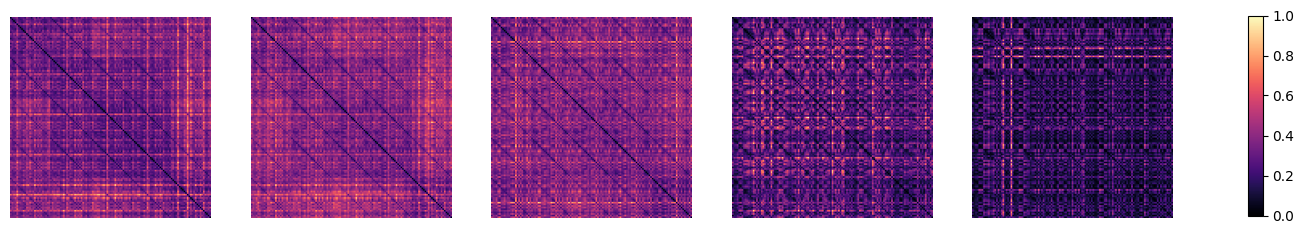

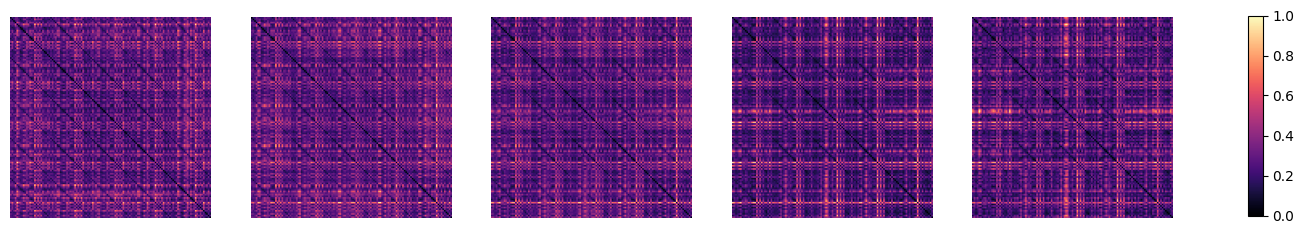

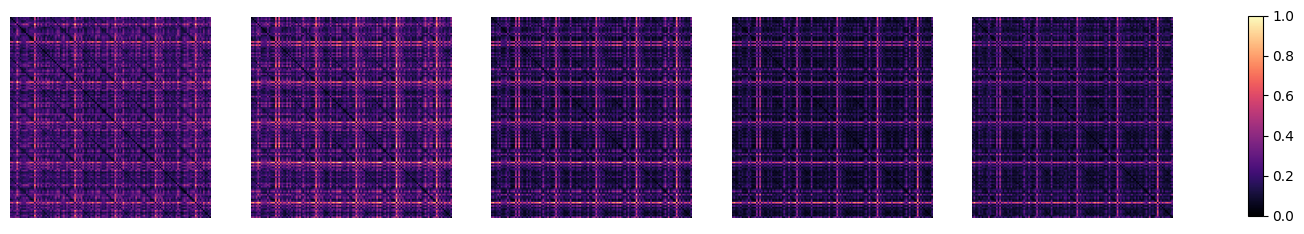

In [4]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=25)
model, gap = load_model_path('./results/classification/vggface2/blt_bl/run_1/')
layers = ['output_3', 'output_2', 'output_1', 'output_0']
#layers = ['IT', 'V4', 'V2', 'V1']
save = 'blt_bl_vggface2'
plot_rdm_mds(model, imgs, labels_i, layers, num_steps=5, plot='rdm', save=None)

build_model_arch(
  (task_model): blt(
    (conv_input): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
    (non_lin_input): ReLU(inplace=True)
    (norm_input): GroupNorm(32, 64, eps=1e-05, affine=True)
    (non_lin_0): ReLU(inplace=True)
    (norm_0): GroupNorm(32, 64, eps=1e-05, affine=True)
    (output_0): Identity()
    (norm_0_1): GroupNorm(32, 128, eps=1e-05, affine=True)
    (non_lin_0_1): ReLU(inplace=True)
    (conv_0_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (non_lin_1): ReLU(inplace=True)
    (norm_1): GroupNorm(32, 128, eps=1e-05, affine=True)
    (output_1): Identity()
    (norm_1_2): GroupNorm(32, 256, eps=1e-05, affine=True)
    (non_lin_1_2): ReLU(inplace=True)
    (conv_1_2): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (non_lin_2): ReLU(inplace=True)
    (norm_2): GroupNorm(32, 256, eps=1e-05, affine=True)
    (output_2): Identity()
    (norm_2_3): GroupNorm(32, 512, eps=1e-05, affine=True)

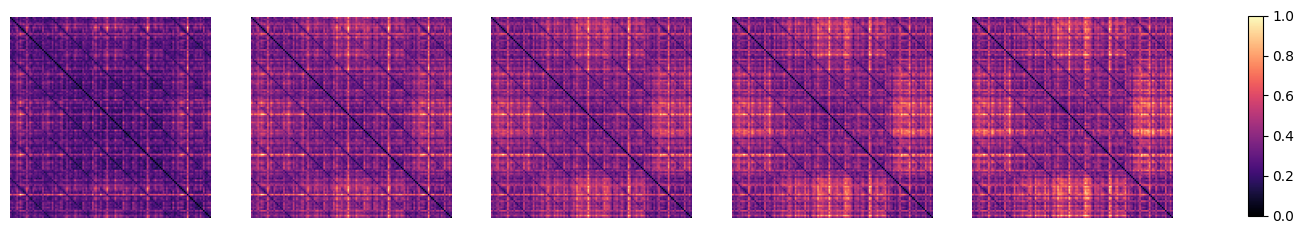

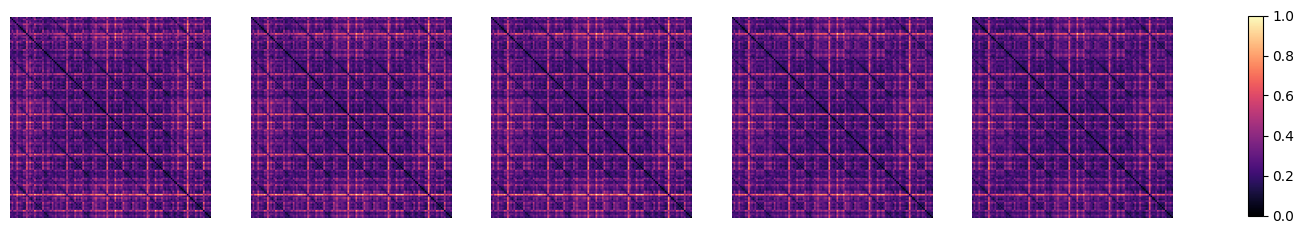

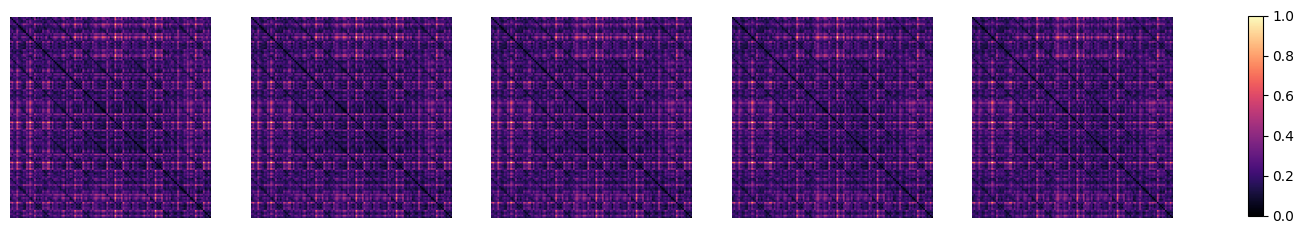

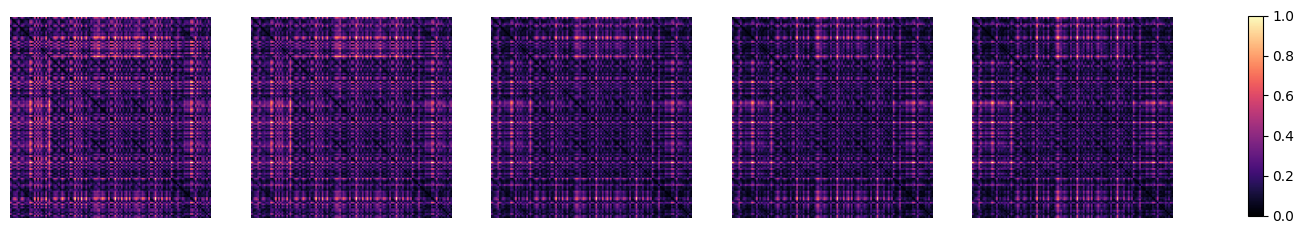

In [5]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=25)
model, gap = load_model_path('../results_new/classification/imagenet/blt_b/run_1/')
layers = ['output_3', 'output_2', 'output_1', 'output_0']
#layers = ['IT', 'V4', 'V2', 'V1']
save = 'blt_bl_imagenet_vggface2'
plot_rdm_mds(model, imgs, labels_i, layers, num_steps=5, plot='rdm', save=None)#, cmap='gray'

100%|██████████| 100/100 [00:00<00:00, 273.51it/s]


array([0.25768978, 0.28303308, 0.12902638, 0.07545911])

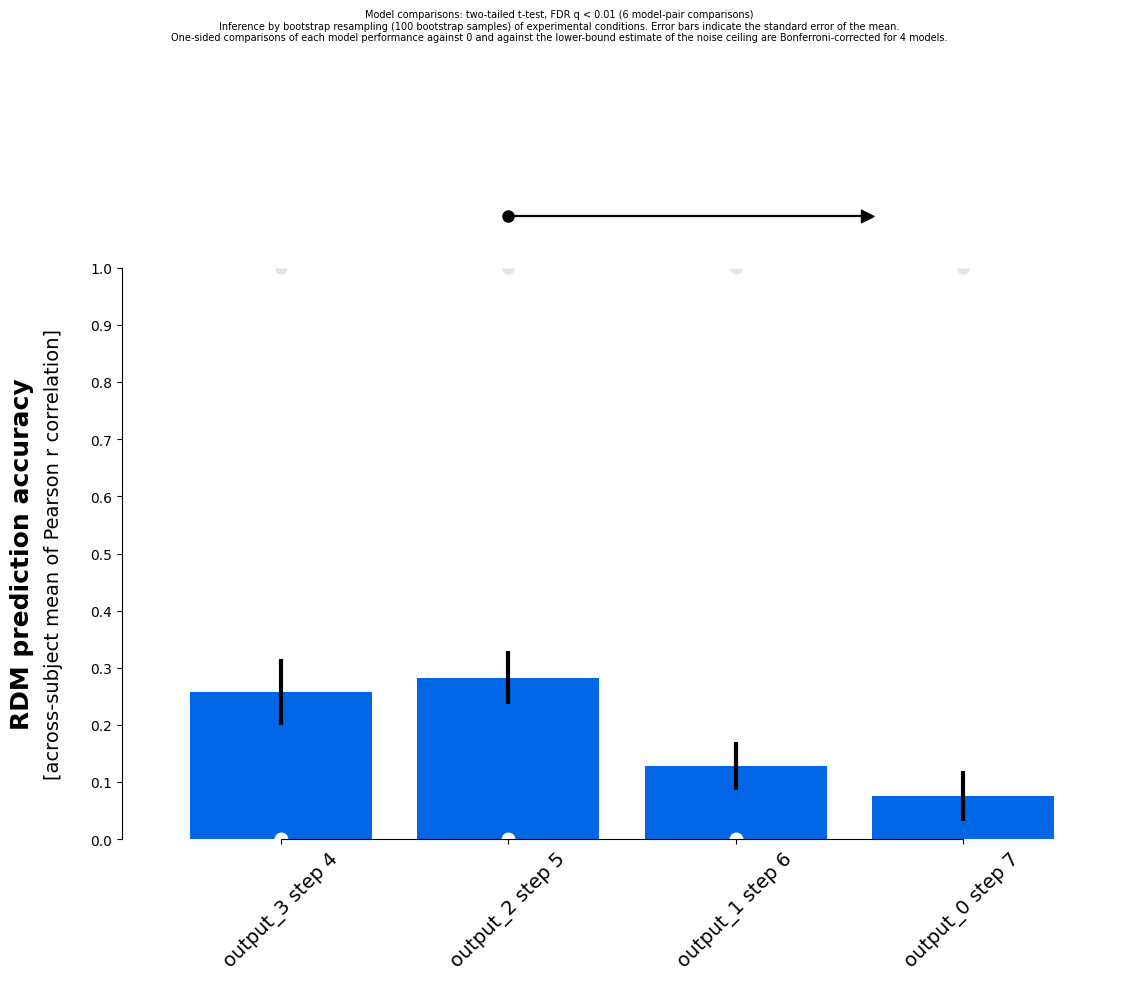

In [6]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=25)
labels = labels_m.unsqueeze(1).float().numpy()
#labels = F.one_hot(labels_i).float().numpy()
#model, gap = load_model_path('../results_new/classification/imagenet_vggface2/blt_b/run_1/')
#layers = ['output_0', 'output_1', 'output_2', 'output_3']
# layers = ['IT', 'V4', 'V2', 'V1']
neuro_data = {'neuro_data':labels}
results, pred_model_names = compare_rdms(model, imgs.to(device), layers, neuro_data, num_steps=1)

results.to_dict()['evaluations'].mean(0)

In [2]:
imgs, labels, neuro_data = kasper_dataset()
model, gap = load_model_path('../results_new/classification/vggface2/blt_bl/run_1/')
layers = ['output_3', 'output_2', 'output_1', 'output_0']
plot_rdm_mds(model, imgs, labels, layers, save=None)

FileNotFoundError: [Errno 2] No such file or directory: './datasets/dataset_face_paper/images.mat'

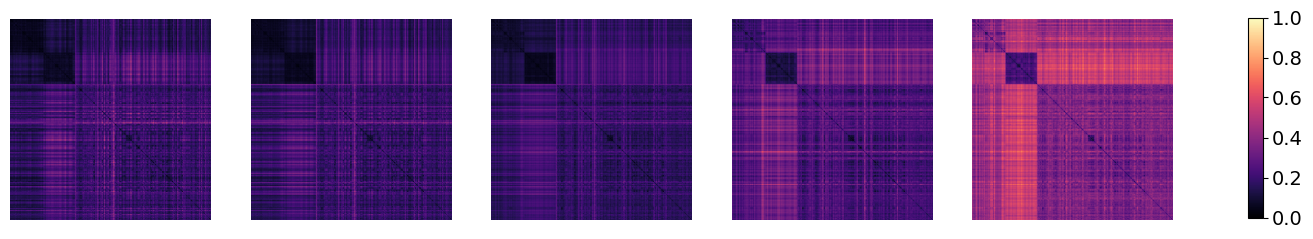

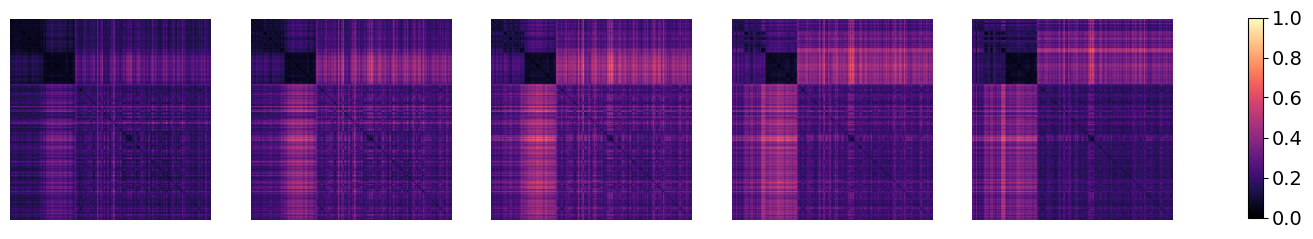

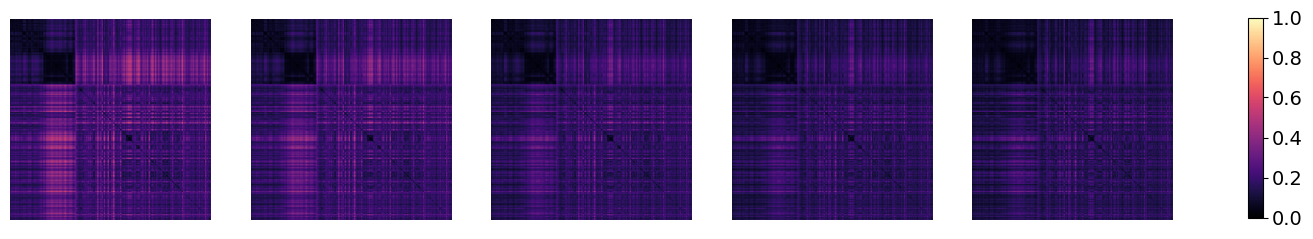

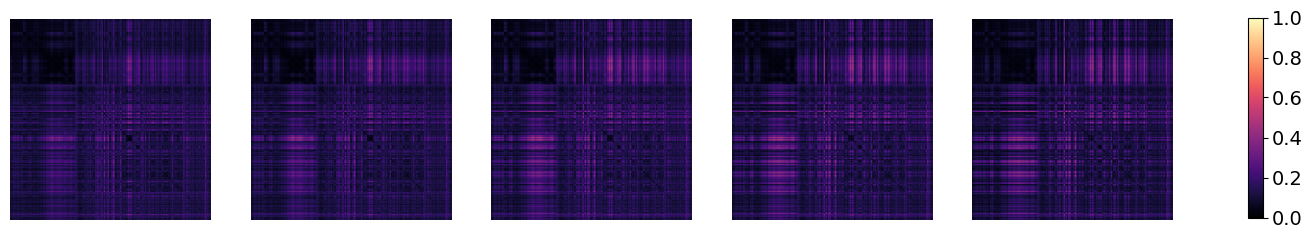

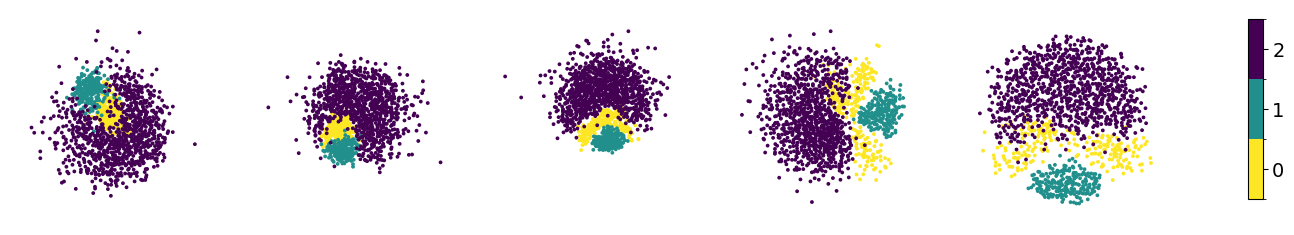

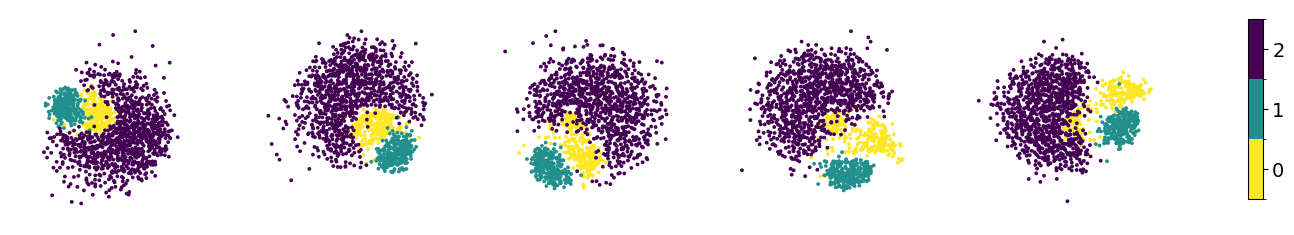

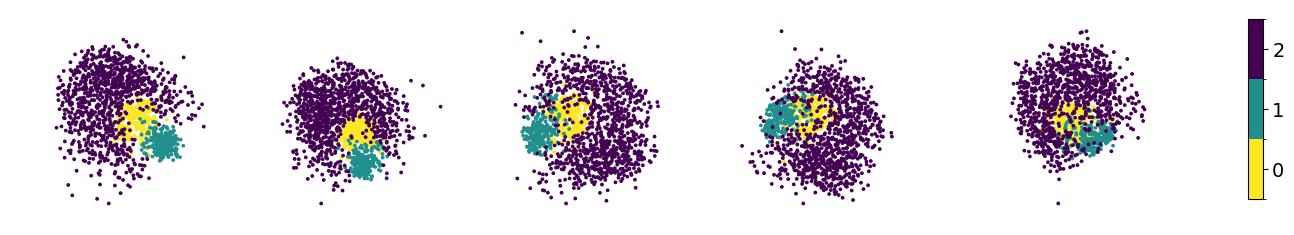

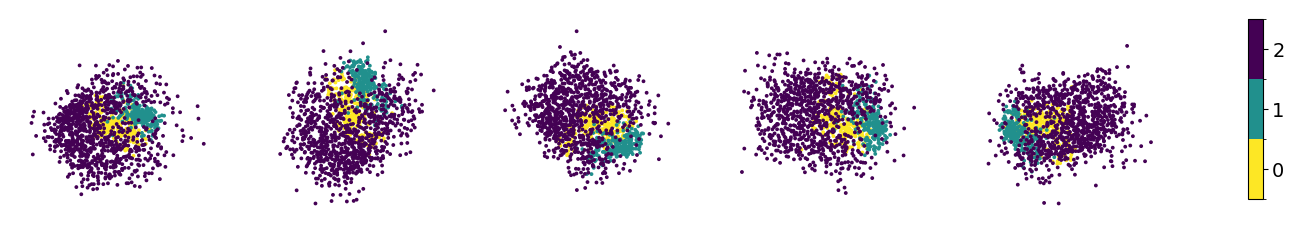

In [8]:
imgs, labels, neuro_data = kasper_dataset()
model, gap = load_model_path('../results_new/classification/imagenet_vggface2/blt_bl/run_1/')
layers = ['output_3', 'output_2', 'output_1', 'output_0']
plot_rdm_mds(model, imgs, labels, layers, save=None)

output shape: (8, 1379, 64)
output shape: (7, 1379, 128)
output shape: (6, 1379, 256)
output shape: (5, 1379, 512)


100%|██████████| 1000/1000 [11:12<00:00,  1.49it/s]


(<Figure size 1250x1000 with 2 Axes>, <Axes: >, <Axes: >)

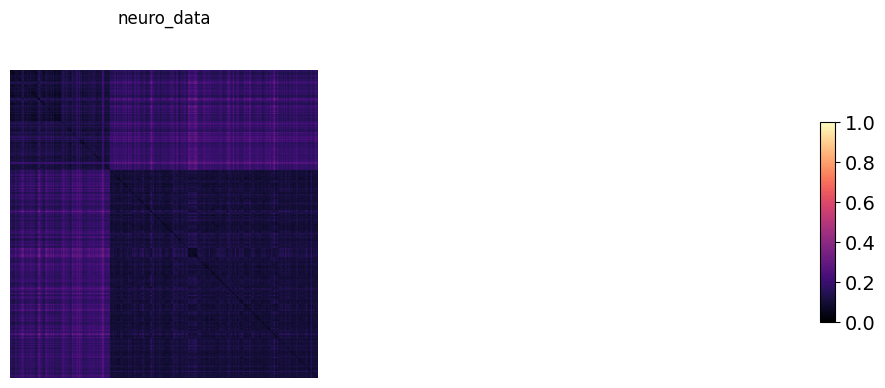

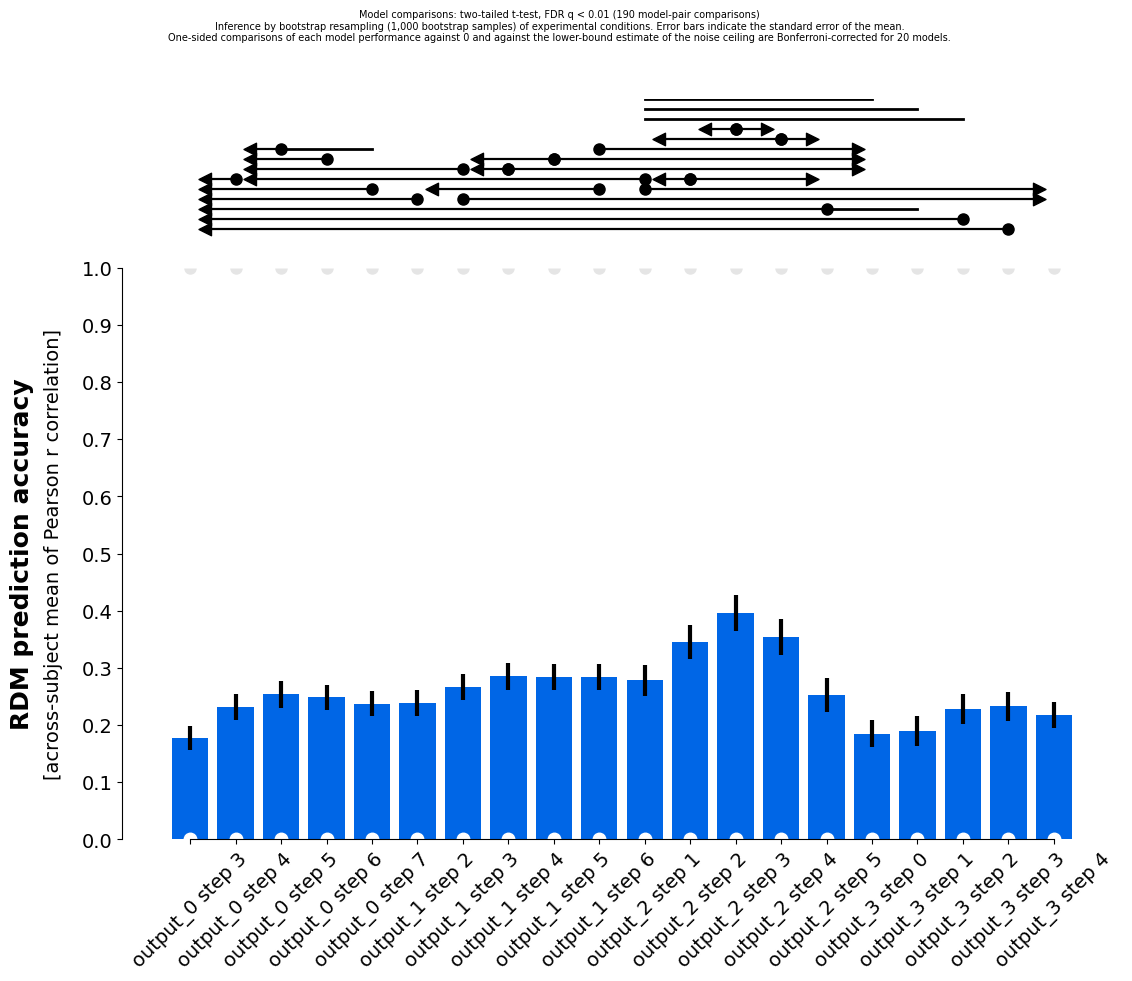

In [17]:
imgs, labels, neuro_data = kasper_dataset()

neuro_rdms, rdms_dict = calc_rdms({'neuro_data':neuro_data})
plot_maps(rdms_dict)

pred_models = []

for layer in ['output_0', 'output_1', 'output_2', 'output_3']:
    features = extract_features(model, imgs.to(device), layer, num_steps=5)
    model_rdms, rdms_dict = calc_rdms(features)

    for model_name in list(features.keys()):
        rdm_m = model_rdms.subset('layer', model_name)
        m = rsatoolbox.model.ModelFixed(f'{layer} {model_name}', rdm_m)
        pred_models.append(m)

results = rsatoolbox.inference.eval_bootstrap_pattern(pred_models, neuro_rdms, method='corr')
rsatoolbox.vis.plot_model_comparison(results)

output shape: (8, 1379, 64)
output shape: (7, 1379, 128)
output shape: (6, 1379, 256)
output shape: (5, 1379, 512)


100%|██████████| 100/100 [01:07<00:00,  1.48it/s]


array([0.13376714, 0.19469301, 0.2220978 , 0.2236518 , 0.2132526 ,
       0.27886633, 0.24609287, 0.19356151, 0.16072901, 0.15404231,
       0.25037351, 0.34509726, 0.4025358 , 0.4395107 , 0.44371842,
       0.13970044, 0.18046023, 0.1930438 , 0.18634267, 0.36156046])

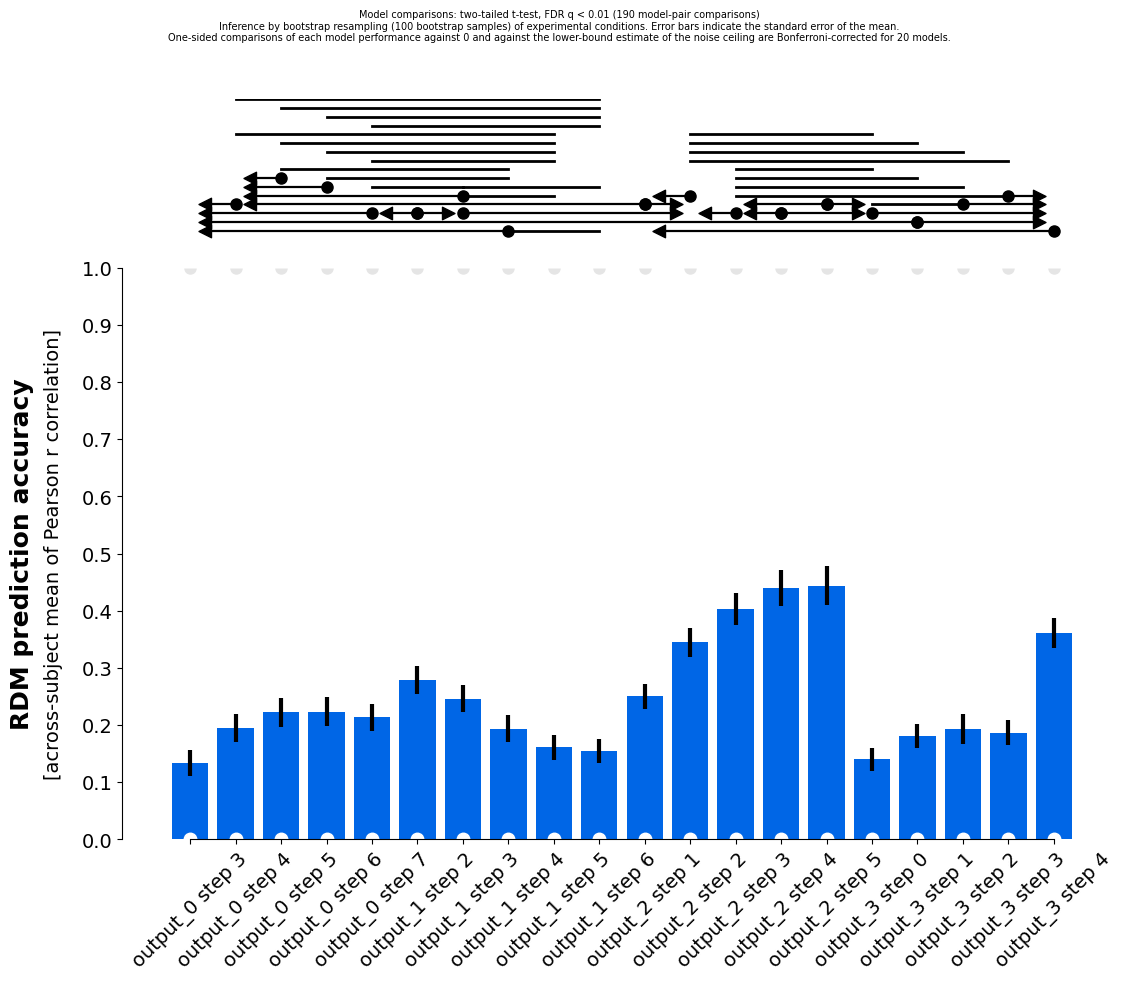

In [40]:
imgs, labels, neuro_data = kasper_dataset()
model, gap = load_model_path('../results_new/classification/imagenet_vggface2/blt_bl/run_1/')
layers = ['output_0', 'output_1', 'output_2', 'output_3']
results, pred_model_names = compare_rdms(model, imgs.to(device), layers, neuro_data)

results.to_dict()['evaluations'].mean(0)